Here I will attempt to solve the cart-pole control problem using reinforcement learning.

In [ ]:
pip install gym

In [ ]:
import gym
import numpy as np
import imageio
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

env = gym.make('CartPole-v1')

Solve the Cart-Pole control problem using TD(0) methods.
For control use on-policy SARSA

In [ ]:
def discretize(state, bins):

    cart_pos_bins = np.linspace(-4.8, 4.8, bins)
    cart_vel_bins = np.linspace(-4, 4, bins)
    pole_angle_bins = np.linspace(-0.418, 0.418, bins)
    pole_vel_bins = np.linspace(-4, 4, bins)


    cart_pos = np.digitize(state[0], cart_pos_bins)
    cart_vel = np.digitize(state[1], cart_vel_bins)
    pole_angle = np.digitize(state[2], pole_angle_bins)
    pole_vel = np.digitize(state[3], pole_vel_bins)

    return (cart_pos, cart_vel, pole_angle, pole_vel)

In [ ]:
def sarsa(env, episodes, alpha=0.1, gamma=0.99, epsilon=0.1, bins=10):
    Q = np.zeros((bins, bins, bins, bins, env.action_space.n))

    for i in range(episodes):
        done = False
        state = discretize(env.reset(), bins)
        action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[state])

        while not done:
            next_state, reward, done, _ = env.step(action)
            next_state = discretize(next_state, bins)
            next_action = np.random.choice(env.action_space.n) if np.random.rand() < epsilon else np.argmax(Q[next_state])


            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action

        if (i + 1) % 100 == 0:
            print(f"Episode {i+1}: Done")

    return Q

In [ ]:
Q_values = sarsa(env, 1000)

Episode 100: Done
Episode 200: Done
Episode 300: Done
Episode 400: Done
Episode 500: Done
Episode 600: Done
Episode 700: Done
Episode 800: Done
Episode 900: Done
Episode 1000: Done


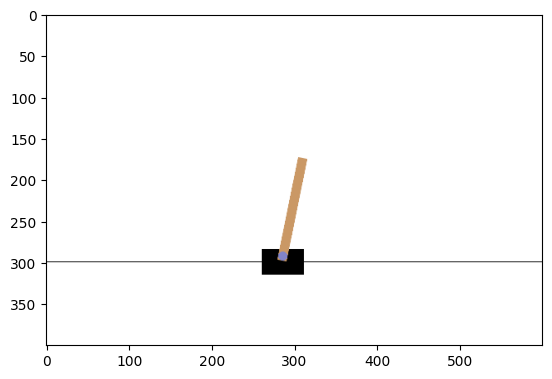

Total reward: 17.0


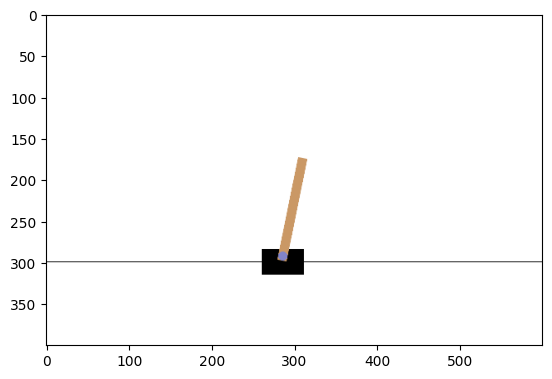

In [ ]:
state = env.reset()
done = False
render_every = 5
frame = 0
total_reward = 0

while not done:
    state = discretize(state, 10)
    action = np.argmax(Q_values[state])
    state, reward, done, info = env.step(action)
    total_reward += reward

    if frame % render_every == 0:
        env.render()
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())

    frame += 1

print(f"Total reward: {total_reward}")
env.close()

Off- Policy Q Learning

In [ ]:
def q_learning(env, episodes, alpha=0.1, gamma=0.99, epsilon=0.1, bins=10):
    Q = np.zeros((bins, bins, bins, bins, env.action_space.n))

    for i in range(episodes):
        done = False
        state = discretize(env.reset(), bins)

        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _ = env.step(action)
            next_state = discretize(next_state, bins)

            # update
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

            state = next_state

        if (i + 1) % 100 == 0:
            print(f"Episode {i+1}: Done")

    return Q

In [ ]:
Q_values = q_learning(env, 1000)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100: Done
Episode 200: Done
Episode 300: Done
Episode 400: Done
Episode 500: Done
Episode 600: Done
Episode 700: Done
Episode 800: Done
Episode 900: Done
Episode 1000: Done


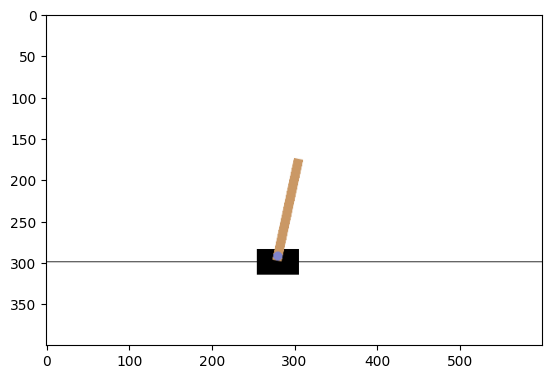

Total reward: 31.0


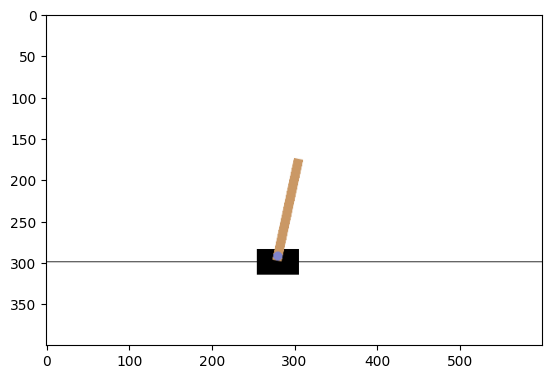

In [ ]:
state = env.reset()
done = False
total_reward = 0
frame = 0

while not done:
    env.render()
    state = discretize(state, 10)
    action = np.argmax(Q_values[state])
    state, reward, done, info = env.step(action)
    total_reward += reward

    if frame % render_every == 0:
        env.render()
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())


    frame += 1

print(f"Total reward: {total_reward}")
env.close()

In [ ]:
def expected_sarsa(env, episodes, alpha=0.1, gamma=0.99, epsilon=0.1, bins=10):
    Q = np.zeros((bins, bins, bins, bins, env.action_space.n))

    for episode in range(episodes):
        state = discretize(env.reset(), bins)
        done = False

        while not done:
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, done, _ = env.step(action)
            next_state = discretize(next_state, bins)

            next_action_probs = np.ones(env.action_space.n) * epsilon / env.action_space.n
            next_action_probs[np.argmax(Q[next_state])] += (1 - epsilon)
            expected_value = np.dot(next_action_probs, Q[next_state])


            Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])

            state = next_state

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode+1}: Done")

    return Q

In [ ]:
Q_values = expected_sarsa(env, 1000)

Episode 100: Done
Episode 200: Done
Episode 300: Done
Episode 400: Done
Episode 500: Done
Episode 600: Done
Episode 700: Done
Episode 800: Done
Episode 900: Done
Episode 1000: Done


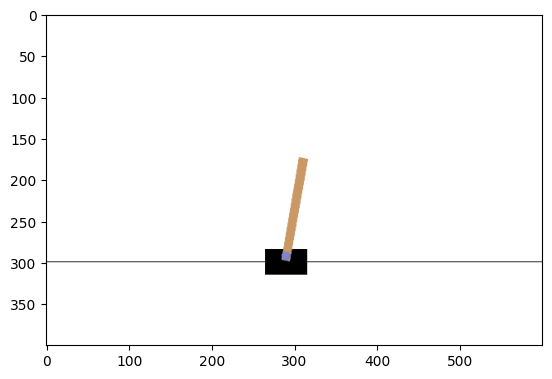

Total reward: 13.0


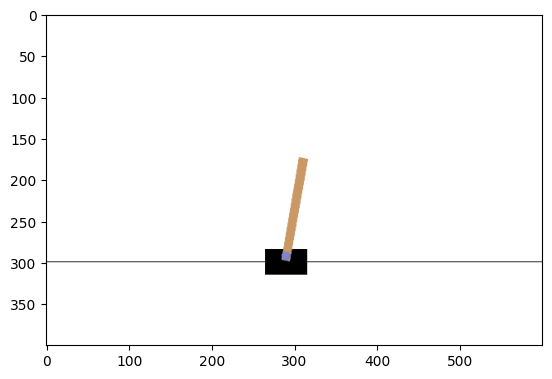

In [ ]:

state = env.reset()
done = False
total_reward = 0
frame = 0

while not done:
    state_index = discretize(state, 10)
    action = np.argmax(Q_values[state_index])
    state, reward, done, info = env.step(action)
    total_reward += reward

    if frame % render_every == 0:
        env.render()
        screen = env.render(mode='rgb_array')
        plt.imshow(screen)
        ipythondisplay.clear_output(wait=True)
        ipythondisplay.display(plt.gcf())

    frame += 1

print(f"Total reward: {total_reward}")
env.close()